In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd
import math
import datetime
import platform

print('Python version:', platform.python_version())
print('Tensorflow version:', tf.__version__)
print('Keras version:', tf.keras)

Python version: 3.10.12
Tensorflow version: 2.17.0
Keras version: <KerasLazyLoader>


In [2]:
loaded_model = tf.keras.models.load_model('digits_recognition_cnn.h5')

In [3]:
loaded_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 8)      │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 8, 16)       │         3,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,612 (146.93 KB)

 Trainable params: 37,610 (146.91 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [4]:
l=[]
for i in range(10):
    # print(f'user-input-digits/image-{i}.jpg')
    l.append(f'user-input-digits/image-{i}.jpg')
l

['user-input-digits/image-0.jpg',
 'user-input-digits/image-1.jpg',
 'user-input-digits/image-2.jpg',
 'user-input-digits/image-3.jpg',
 'user-input-digits/image-4.jpg',
 'user-input-digits/image-5.jpg',
 'user-input-digits/image-6.jpg',
 'user-input-digits/image-7.jpg',
 'user-input-digits/image-8.jpg',
 'user-input-digits/image-9.jpg']

In [5]:
image_paths = [f'user-input-digits/image-{i}.jpg' for i in range(10)]
image_paths

['user-input-digits/image-0.jpg',
 'user-input-digits/image-1.jpg',
 'user-input-digits/image-2.jpg',
 'user-input-digits/image-3.jpg',
 'user-input-digits/image-4.jpg',
 'user-input-digits/image-5.jpg',
 'user-input-digits/image-6.jpg',
 'user-input-digits/image-7.jpg',
 'user-input-digits/image-8.jpg',
 'user-input-digits/image-9.jpg']

In [6]:
#Load new images
## create list(array) of new images: now image_5
from PIL import Image, ImageOps

y_true = np.array([0,1,2,3,4,5,6,7,8,9])

gray_images = []
for i in image_paths:
    gray_images.append(np.array(ImageOps.invert(Image.open(i).convert("L"))))

new_inputs = np.array(gray_images)

new_inputs.shape

(10, 28, 28)

In [7]:
pd.DataFrame(new_inputs[1])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,255,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,254,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,255,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
(_, IMAGE_WIDTH, IMAGE_HEIGHT) = new_inputs.shape 
IMAGE_CHANNELS = 1

print('IMAGE_WIDTH:', IMAGE_WIDTH)
print('IMAGE_HEIGHT:', IMAGE_HEIGHT)
print('IMAGE_CHANNELS:', IMAGE_CHANNELS)

IMAGE_WIDTH: 28
IMAGE_HEIGHT: 28
IMAGE_CHANNELS: 1


In [9]:
## reshape list(array) of new images with channel: 28*28*1

new_inputs_chanels = new_inputs.reshape(
    new_inputs.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)
new_inputs_chanels.shape


(10, 28, 28, 1)

In [14]:
# # normalize the test inputs
new_inputs_normalized = new_inputs_chanels/255
new_inputs_normalized.shape

(10, 28, 28, 1)

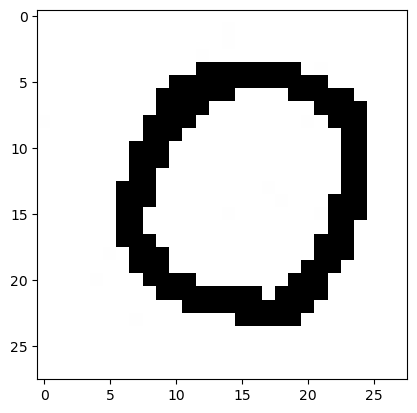

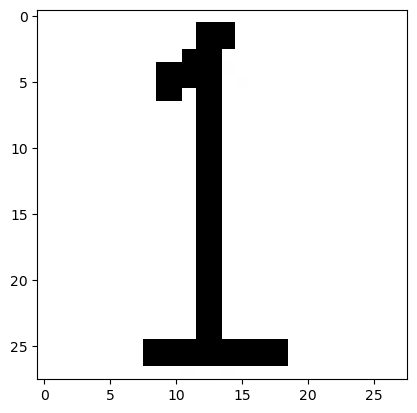

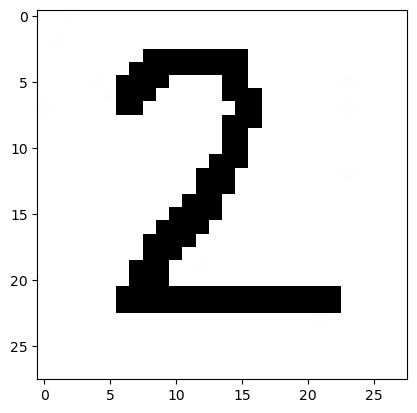

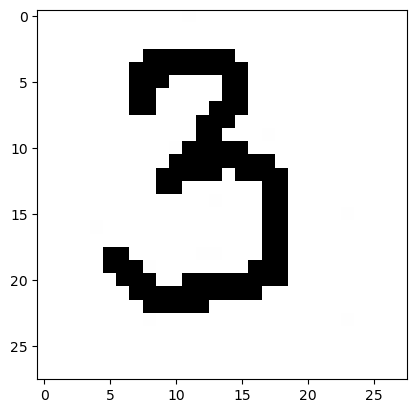

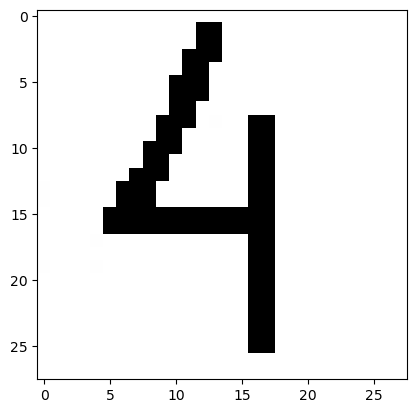

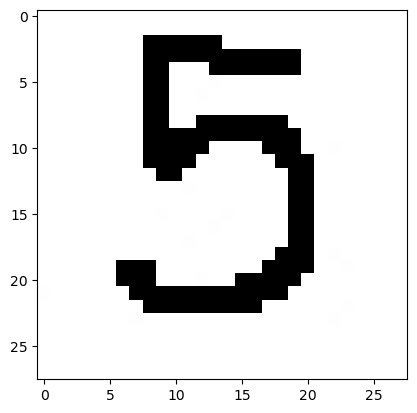

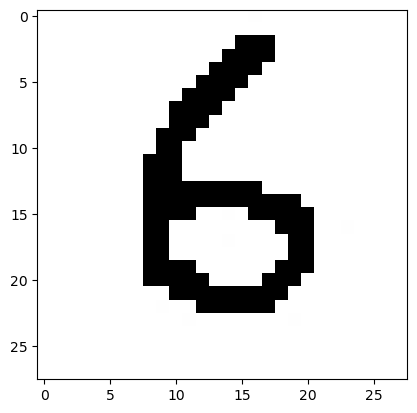

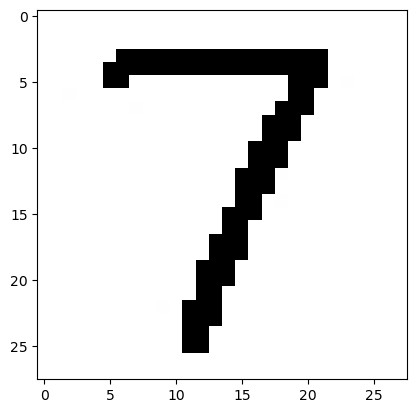

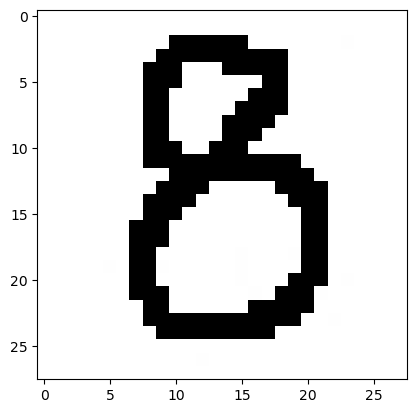

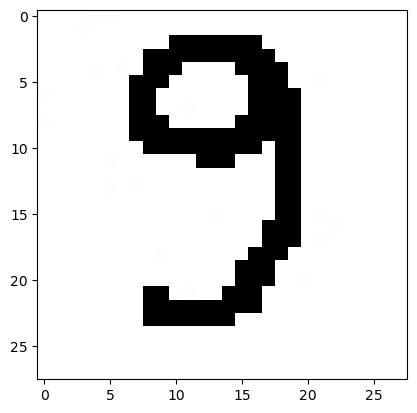

In [16]:
#plot images

for i in range(new_inputs_normalized.shape[0]):
  plt.imshow(new_inputs_normalized[i], cmap=plt.cm.binary)
  plt.show()

In [17]:
# Predict new_inputs_normalized

preds = loaded_model.predict([new_inputs_normalized])

pd.DataFrame(preds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


,0,1,2,3,4,5,6,7,8,9
0,1.000000e+00,6.427690e-29,3.662298e-17,1.040779e-25,2.910743e-24,8.328010e-16,1.364329e-08,4.057760e-22,5.751735e-20,3.138351e-12
1,3.937557e-13,2.934237e-01,5.649181e-06,6.346784e-05,6.288591e-08,1.118446e-06,9.003339e-11,7.065058e-01,4.057229e-09,6.981764e-08
2,2.161898e-26,2.184918e-22,1.000000e+00,2.113013e-24,0.000000e+00,0.000000e+00,2.715652e-28,3.523301e-32,1.267717e-22,0.000000e+00
3,1.131592e-18,8.812891e-16,1.091844e-14,1.000000e+00,1.568604e-18,3.631270e-09,6.821593e-16,5.075180e-17,6.129102e-17,7.427005e-16
4,5.238466e-30,1.478645e-20,1.835638e-21,1.910650e-34,1.000000e+00,8.157582e-18,2.708687e-22,2.543584e-24,2.906276e-21,4.781793e-15
5,3.060732e-11,3.534898e-10,7.203307e-08,4.247537e-06,2.417645e-10,9.999865e-01,2.305713e-11,5.344999e-10,6.146059e-11,9.222287e-06
6,1.967302e-15,4.508690e-19,6.135198e-21,1.882319e-21,1.059929e-14,3.183553e-03,9.968165e-01,5.623904e-27,3.283577e-10,1.030295e-11
7,1.170305e-23,7.328658e-08,1.974227e-13,5.340839e-18,3.103133e-14,6.332513e-19,1.408302e-21,9.999999e-01,9.290623e-19,3.188872e-16
8,1.120917e-08,2.745797e-10,1.426118e-07,2.952944e-13,1.116277e-11,4.911866e-07,7.260925e-06,2.218886e-13,9.999921e-01,1.542770e-13
9,9.500966e-04,2.447883e-01,5.041478e-01,1.421326e-02,1.036628e-02,2.165220e-01,2.354096e-05,2.099293e-03,2.142181e-05,6.867954e-03


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


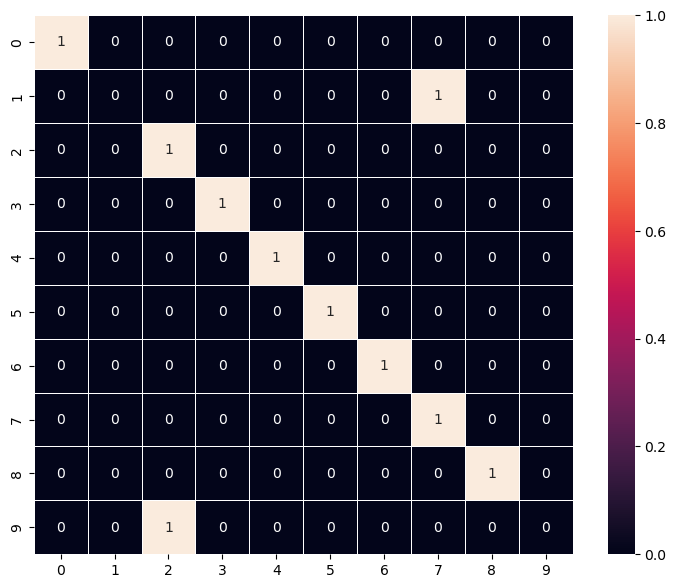

In [34]:
# Confusion Matrix with new_inputs_channels

preds = loaded_model.predict([new_inputs_normalized])

y_pred = pd.DataFrame(np.argmax(preds, axis=1))

confusion_matrix = tf.math.confusion_matrix(y_true, y_pred)
f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.5,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

In [25]:
# Evaluate Model with new_inputs_channels

validation_loss, validation_accuracy = loaded_model.evaluate(new_inputs_chanels, y_true)

validation_loss, validation_accuracy

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.9000 - loss: 80.6084


(80.60844421386719, 0.8999999761581421)

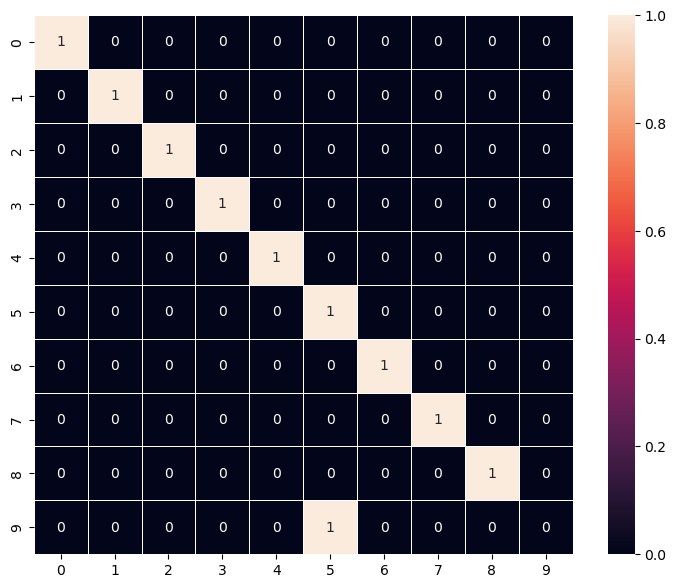

In [30]:
# Confusion Matrix with new_inputs_channels

y_pred = loaded_model.predict([new_inputs_chanels])

confusion_matrix = tf.math.confusion_matrix(y_true, y_pred)
f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.5,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()